In [30]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
data = pd.read_csv('IQ_info_288samples.csv')

In [32]:
data

,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,time_per_channel
0,0,33,(87-48j),87,-48,99.362971,9.00,9.00
1,0,33,(61-78j),61,-78,99.020200,9.25,9.25
2,0,33,(28-93j),28,-93,97.123633,9.50,9.50
3,0,33,(-15-94j),-15,-94,95.189285,9.75,9.75
4,0,33,(-71+67j),-71,67,97.621719,11.00,11.00
...,...,...,...,...,...,...,...,...
21307,73,15,(6-18j),6,-18,18.973666,11537.75,149.75
21308,73,15,(-21+3j),-21,3,21.213203,11539.00,151.00
21309,73,15,(-19+10j),-19,10,21.470911,11539.25,151.25
21310,73,15,(-15+15j),-15,15,21.213203,11539.50,151.50


array([<AxesSubplot:>], dtype=object)

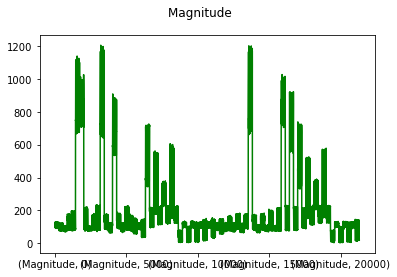

In [33]:
data.unstack(level=0)[['Magnitude']].plot(subplots=True, title="Magnitude ", color = 'green')

## Separating each antenna per channel

In [34]:
data_size = len(data)
N = int(data_size/288)
print(N)
info_per_ant = []
for n in range(N):
    for k in range(0 + n*288, 288*(n+1), 3):
        info_per_ant.append({"pkt": data['pkt'][k], 
                             "channel": data['Channel'][k], 
                             "I_ANT1": data['I'][k+2],
                             "I_ANT2": data['I'][k], 
                             "I_ANT3": data['I'][k + 1],
                             "Q_ANT1": data['Q'][k+2],
                             "Q_ANT2": data['Q'][k], 
                             "Q_ANT3": data['Q'][k + 1],
                             "Mag_ANT1": data['Magnitude'][k+2],
                             "Mag_ANT2": data['Magnitude'][k], 
                             "Mag_ANT3": data['Magnitude'][k + 1],})
result = pd.DataFrame(info_per_ant)

74


array([<AxesSubplot:>], dtype=object)

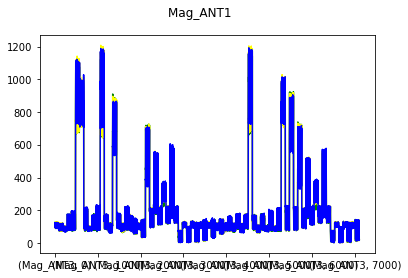

In [35]:
result.unstack(level=0)[['Mag_ANT1']].plot(subplots=True, title="Mag_ANT1 ", color = 'green')
result.unstack(level=0)[['Mag_ANT2']].plot(subplots=True, title="Mag_ANT1 ", color = 'yellow')
result.unstack(level=0)[['Mag_ANT3']].plot(subplots=True, title="Mag_ANT1 ", color = 'blue')

# Calculate the complex conjucate of ecah section
X.X* for each antenna set. i.e: 
- [ANT1, ANT2]; [ANT2, ANT3]; [ANT3, ANT1]
meaning theat we have the following relation ship:
- [ANT1.ANT2* ; ANT2.ANT1*; ANT3.ANT1*]
- This matrix wil give us all the phase difference. Let's say that the phase diffrence of ANT3.ANT1* = 1/2 * phase difference of ANT1.ANT2* or ANT2.ANT3*. 

In [36]:
X12 = (result['I_ANT1'] + 1j*result['Q_ANT1']) * (result['I_ANT2'] - 1j*result['Q_ANT2'])
X23 = (result['I_ANT2'] + 1j*result['Q_ANT2']) * (result['I_ANT3'] - 1j*result['Q_ANT3'])
X13 = (result['I_ANT1'] + 1j*result['Q_ANT1']) * (result['I_ANT3'] - 1j*result['Q_ANT3'])

In [37]:
d = {'channel': result['channel'], 'x12': X12, 'x23': X23, 'x13': X13}
xx = pd.DataFrame(data=d)
xx['teta12'] = xx['x12']

# Now adding the frequency for each channel
first, introducing w as center frequency of each channel!

In [38]:
w = []
for n in range(0,11):
    w.append(2404.25 + n*2)
for n in range(11, 37):
    w.append(2428.25 + (n-11)*2)

In [39]:
np.angle(0-1j)

-1.5707963267948966

In [40]:
omegat = []
for i in range(37):
    channel_posi = np.where(xx['channel'] == i)
    channel_posi_arr = np.array(channel_posi)
    if np.any(channel_posi_arr) == True:
        xx['teta12'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x12']))*180/np.pi # c/f * xx * 1/2pi * 1/d
        xx['teta23'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x23']))*180/np.pi
        xx['teta13'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*np.angle(xx['x13']))*180/np.pi
#         xx['complex_teta12'] = np.arcsin(((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*xx['x12']))*180/np.pi # c/f * xx * 1/2pi * 1/d
#         xx['complex_teta23'] = np.arcsin(((2.9*1e10)/(3.5*2*np.pi)*(1/w[i])*10**-6*xx['x23']))*180/np.pi
#         xx['complex_teta13'] = np.arcsin(((2.9*1e10)/(2*3.5*2*np.pi)*(1/w[i])*10**-6*xx['x13']))*180/np.pi
xx

,channel,x12,x23,x13,teta12,teta23,teta13
0,33,6900.00-6747.00j,9051.0+3858.0j,8962.0-3489.0j,-23.603352,12.284492,-5.659430
1,33,-8187.00-4873.00j,-5233.0+7679.0j,8858.0-4124.0j,-79.411888,66.127561,-6.642163
2,33,-10412.0-6755.0j,10090.0+3893.0j,-7265.0-10026.0j,-78.234472,11.226542,-33.503965
3,33,10437.0-10635.0j,14004.0+5952.0j,13642.0-5654.0j,-24.231612,12.252748,-5.989432
4,33,10337.0-12314.0j,14051.0+7082.0j,14839.0-6372.0j,-26.599432,14.233562,-6.182935
...,...,...,...,...,...,...,...
7099,15,7468.00-9260.00j,10754.0+5588.0j,10578.0-4634.0j,-27.198778,14.610433,-6.294173
7100,15,6903.00-8674.00j,9469.0+4970.0j,10279.0-4532.0j,-27.396595,14.736195,-6.330200
7101,15,-1008.00-1904.00j,0.0+200960.000j,476.00-252.00j,-62.734830,47.890291,-7.422269
7102,15,-240.000-330.000j,360.000+60.000j,-180.00-360.00j,-67.060974,5.035037,-31.012968


In [41]:
xx['teta12_2.4GH'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/2404.25)*10**-6*np.angle(xx['x12']))*180/np.pi # c/f * xx * 1/2pi * 1/d
xx['teta23_2.4GH'] = ((2.9*1e10)/(3.5*2*np.pi)*(1/2404.25)*10**-6*np.angle(xx['x23']))*180/np.pi
xx['teta13_2.4GH'] = ((2.9*1e10)/(2*3.5*2*np.pi)*(1/2404.25)*10**-6*np.angle(xx['x13']))*180/np.pi

In [42]:
print(np.average(xx['teta12']), np.average(xx['teta23']), np.average(xx['teta13']))
print(np.average(xx['teta12'])+ np.average(xx['teta23'])+ np.average(xx['teta13']))

-41.06519061156233 23.60183718688996 -12.655121195028189
-30.118474619700557


In [43]:
print(np.average(xx['teta12_2.4GH']), np.average(xx['teta23_2.4GH']), np.average(xx['teta13_2.4GH']))
print(np.average(xx['teta12_2.4GH'])+ np.average(xx['teta23_2.4GH'])+ np.average(xx['teta13_2.4GH']))

-42.32912909768301 24.32827410144954 -13.044631008247318
-31.045486004480786


In [44]:
phi_channel = []
for i in range(0, len(xx), 98):
    phi_channel.append({"channel":xx['channel'][i], 
                       "ave_phi12": np.average(xx['teta12'][i-98:i]),
                       "ave_phi23": np.average(xx['teta23'][i-98:i]), 
                       "ave_phi13": np.average(xx['teta13'][i-98:i]),
                       "ave_phi12_2.4GH": np.average(xx['teta12_2.4GH'][i-98:i]),
                       "ave_phi23_2.4GH": np.average(xx['teta23_2.4GH'][i-98:i]), 
                       "ave_phi13_2.4GH": np.average(xx['teta13_2.4GH'][i-98:i]),
#                        "ave_complex_phi12": np.real(np.average(xx['complex_teta12'][i-98:i])),
#                        "ave_complex_phi23": np.real(np.average(xx['complex_teta23'][i-98:i])), 
#                        "ave_complex_phi13": np.real(np.average(xx['complex_teta13'][i-98:i])),
                       })
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
average_phi_perchannel

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,channel,ave_phi12,ave_phi23,ave_phi13,ave_phi12_2.4GH,ave_phi23_2.4GH,ave_phi13_2.4GH
1,31,-54.183155,27.789179,-13.196988,-55.850849,28.644498,-13.603176
2,26,-48.524553,25.327660,-13.553152,-50.018081,26.107215,-13.970302
3,8,-32.373465,28.644839,-13.592547,-33.369882,29.526494,-14.010910
4,7,-49.743996,24.453414,-13.622644,-51.275058,25.206062,-14.041933
5,27,-43.529928,25.558970,-13.872243,-44.869728,26.345646,-14.299215
...,...,...,...,...,...,...,...
68,17,-37.694118,24.946103,-11.260772,-38.854299,25.713915,-11.607365
69,35,-40.583573,25.010953,-12.673074,-41.832687,25.780761,-13.063136
70,16,-42.001903,24.599572,-13.587930,-43.294672,25.356718,-14.006150
71,34,-38.670955,23.281993,-13.558598,-39.861202,23.998586,-13.975916


array([<AxesSubplot:>], dtype=object)

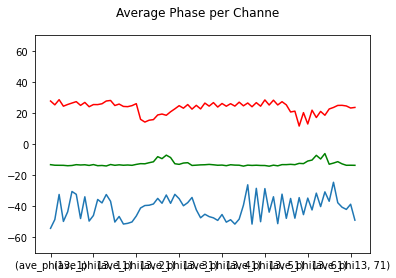

In [24]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-70,+70])
average_phi_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'green')

array([<AxesSubplot:>], dtype=object)

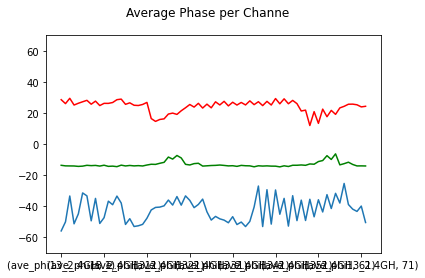

In [25]:
average_phi_perchannel.unstack(level=0)[['ave_phi12_2.4GH']].plot(subplots=True, title="Average Phase per Channel", ylim=[-70,+70])
average_phi_perchannel.unstack(level=0)[['ave_phi23_2.4GH']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_phi13_2.4GH']].plot(subplots=True, title="Average Phase per Channe", ylim=[-70,+70], color = 'green')

array([<AxesSubplot:>], dtype=object)

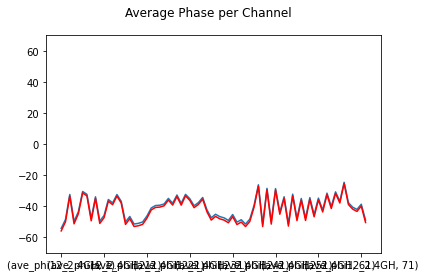

In [26]:
average_phi_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-70,+70])
average_phi_perchannel.unstack(level=0)[['ave_phi12_2.4GH']].plot(subplots=True, title="Average Phase per Channel", ylim=[-70,+70], color= 'red')

In [19]:
print(np.average(average_phi_perchannel['ave_phi12']), np.average(average_phi_perchannel['ave_phi23']), np.average(average_phi_perchannel['ave_phi13']))

-25.3604256877036 14.037353430106386 -7.176299833425377


In [20]:
print((np.average(average_phi_perchannel['ave_phi12'])+ np.average(average_phi_perchannel['ave_phi23'])+ np.average(average_phi_perchannel['ave_phi13']))/3)

-6.166457363674198


array([<AxesSubplot:>], dtype=object)

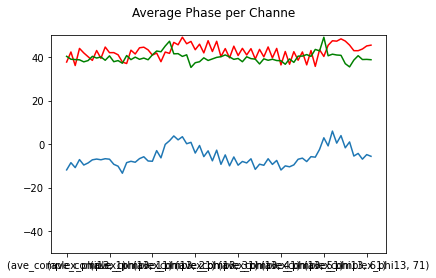

In [21]:
average_phi_perchannel.unstack(level=0)[['ave_complex_phi12']].plot(subplots=True, title="Average Phase per Channel", ylim=[-50,+50])
average_phi_perchannel.unstack(level=0)[['ave_complex_phi23']].plot(subplots=True, title="Average Phase per Channe", ylim=[-50,+50], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_complex_phi13']].plot(subplots=True, title="Average Phase per Channe", ylim=[-50,+50], color = 'green')

array([<AxesSubplot:>], dtype=object)

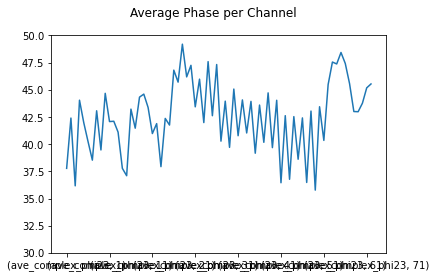

In [22]:
average_phi_perchannel.unstack(level=0)[['ave_complex_phi23']].plot(subplots=True, title="Average Phase per Channel", ylim=[30,+50])

# K_nearest neighborhood

In [23]:
from sklearn.cluster import KMeans

In [24]:
teta12 = np.array([xx['channel'], xx['teta12']])
teta23 = np.array([xx['channel'], xx['teta23']])
teta13 = np.array([xx['channel'], xx['teta13']])

teta12 = np.transpose(teta12)
teta23 = np.transpose(teta23)
teta13 = np.transpose(teta13)

kmeans_teta12 = KMeans(n_clusters=35).fit(teta12)
y_kmeans_teta12 = kmeans_teta12.predict(teta12)
centers_teta12 = kmeans_teta12.cluster_centers_

kmeans_teta23 = KMeans(n_clusters=35).fit(teta23)
y_kmeans_teta23 = kmeans_teta23.predict(teta23)
centers_teta23 = kmeans_teta23.cluster_centers_

kmeans_teta13 = KMeans(n_clusters=35).fit(teta13)
y_kmeans_teta13 = kmeans_teta13.predict(teta13)
centers_teta13 = kmeans_teta13.cluster_centers_

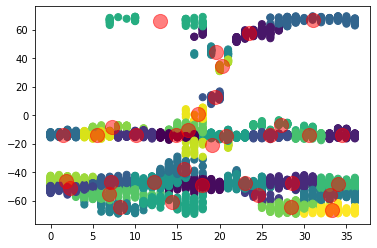

In [25]:
from matplotlib.pyplot import*
import matplotlib.pyplot as plt
plt.scatter(teta12[:, 0], teta12[:, 1], c=y_kmeans_teta12, s=50, cmap='viridis')
plt.scatter(centers_teta12[:, 0], centers_teta12[:, 1], c='red', s=200, alpha=0.5);

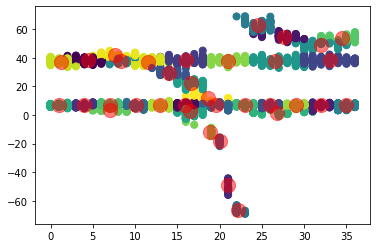

In [26]:
plt.scatter(teta23[:, 0], teta23[:, 1], c=y_kmeans_teta23, s=50, cmap='viridis')
plt.scatter(centers_teta23[:, 0], centers_teta23[:, 1], c='red', s=200, alpha=0.5);

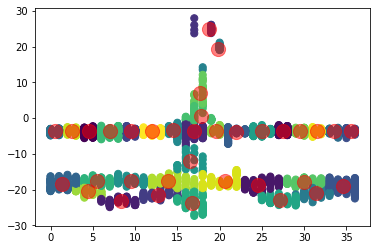

In [27]:
plt.scatter(teta13[:, 0], teta13[:, 1], c=y_kmeans_teta13, s=50, cmap='viridis')
plt.scatter(centers_teta13[:, 0], centers_teta13[:, 1], c='red', s=200, alpha=0.5);

In [28]:
print(np.average(centers_teta12[:, 1]), np.average(centers_teta23[:, 1]), np.average(centers_teta13[:, 1]))

-20.646718922392584 16.425694729429054 -8.441206304789214


## Calculating KKN per channel! 

In [29]:
knearest_arry = []
average_center_perchannel_teta12 = []
average_center_perchannel_teta23 = []
average_center_perchannel_teta13 = []
channel = []

knearest_lst12 = np.array([xx['channel'][0:98], xx['teta12'][0:98]])
knearest_lst23 = np.transpose(knearest_lst12)

knearest_lst23 = np.array([xx['channel'][0:98], xx['teta12'][0:98]])
knearest_lst23 = np.transpose(knearest_lst23)

knearest_lst13 = np.array([xx['channel'][0:98], xx['teta12'][0:98]])
knearest_lst13 = np.transpose(knearest_lst13)

for i in range(98, len(xx), 98):
    knearest_arry12 = np.array([xx['channel'][i-98:i], xx['teta12'][i-98:i]])
    knearest_arry12 = np.transpose(knearest_arry12)
    
    knearest_arry23 = np.array([xx['channel'][i-98:i], xx['teta23'][i-98:i]])
    knearest_arry23 = np.transpose(knearest_arry23)
    
    knearest_arry13 = np.array([xx['channel'][i-98:i], xx['teta13'][i-98:i]])
    knearest_arry13 = np.transpose(knearest_arry13)
    
    kmeans_teta12 = KMeans(n_clusters=35).fit(knearest_arry12)
    kmeans_teta23 = KMeans(n_clusters=35).fit(knearest_arry23)
    kmeans_teta13 = KMeans(n_clusters=35).fit(knearest_arry13)

    
    y_kmeans_teta12 = kmeans_teta12.predict(knearest_arry12)
    y_kmeans_teta23 = kmeans_teta23.predict(knearest_arry23)
    y_kmeans_teta13 = kmeans_teta13.predict(knearest_arry13)

    
    centers_teta12 = kmeans_teta12.cluster_centers_
    centers_teta23 = kmeans_teta23.cluster_centers_
    centers_teta13 = kmeans_teta13.cluster_centers_

    
#     plt.scatter(knearest_arry[:, 0], knearest_arry[:, 1], c=y_kmeans_teta12, s=50, cmap='viridis')
#     plt.scatter(centers_teta12[:, 0], centers_teta12[:, 1], c='red', s=20, alpha=0.5);
    average_center_perchannel_teta12.append(np.average(centers_teta12[:, 1]))
    average_center_perchannel_teta23.append(np.average(centers_teta23[:, 1]))
    average_center_perchannel_teta13.append(np.average(centers_teta13[:, 1]))
    channel.append(xx['channel'][i])
    print(np.average(centers_teta12[:, 1]), np.average(centers_teta23[:, 1]), np.average(centers_teta13[:, 1]))
    
                      

-44.83692952666912 27.981366321962263 -11.245892773300627
-34.23436892271043 22.490032400638 -11.449114841853106
-23.73918678490411 31.596120750342394 -12.117407804097931
-36.06514350507984 19.4200123196028 -9.752252405540785
-28.569113862530106 22.997483359648847 -10.99308274412418
-16.236980459424643 26.039904497694543 -10.625925112812789
-24.94117046359428 26.736132628720153 -9.921675825114033
-33.94658138936041 21.194072066987577 -9.902045890809799
-26.31593214069788 25.80641157020646 -9.445268872446828
-32.86248493222953 18.09553242245484 -10.672991256826235
-28.233145175393343 22.07758736182194 -10.222327203602024
-21.607032702433674 26.1302092934832 -10.855731539667065
-27.22668569999655 22.79852624518911 -10.956454625312238
-19.649882010134572 25.789690833427148 -11.29960431377348
-25.90941496639535 28.513915544032425 -9.79664637072922
-35.15390690751517 20.907023348055137 -11.047931834459407
-35.431472338252654 24.29424436680061 -12.022619918296064
-39.275037517144995 20.77599

In [30]:
print(np.average(average_center_perchannel_teta12), np.average(average_center_perchannel_teta23), np.average(average_center_perchannel_teta13))

-27.85899955334957 20.305747950209092 -9.99643847141481


In [31]:
print((np.average(average_center_perchannel_teta12)+ np.average(average_center_perchannel_teta23)+ np.average(average_center_perchannel_teta13))/3)

-5.8498966915184285


In [36]:
import scipy.optimize as optimization
import numpy as np


x = np.array([120, 125, 158, 300, 350, 390, 2800, 5900, 7790])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# start = np.array([17933, 0.01, 0.31])

def objective(x,a,b):
    return a*x+b

print(optimization.curve_fit(objective, x, y))

(array([7.84740750e-04, 3.43636045e+00]), array([[ 3.80371467e-08, -7.57911280e-05],
       [-7.57911280e-05,  4.38499358e-01]]))


In [38]:
popt, _ = optimization.curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.00078 * x + 3.43636


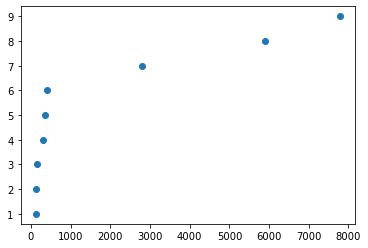

In [40]:
from matplotlib import pyplot
pyplot.scatter(x, y)

In [42]:
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)

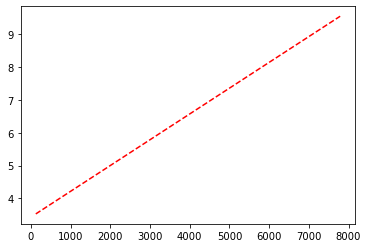

In [43]:
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')